In [3]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
from agents import EGreedy, EGreedySoftmax
from bandit_testbed import TestBed

import numpy as np
from matplotlib import pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

<H3> 1. Define the agents with arguments for instantiation </H3>

In [4]:
agents = {
    "greedy : e = 0.01": {"class": EGreedy, "args": {"e": 0.01}},
    "greedy : e = 0.1": {"class": EGreedy, "args": {"e": 0.1}}
}

<H3> 2. Run the agents on the testbed </H3>

In [ ]:
def measure_performance_on_testbed(agents):
    """
    :parma agents: A dictionary with a description and (Class, Arguments) for each agent
    :return A dictionary with { label : [ average_reward_stat, optimal_performance_stat]}
    :rtype: dict
    """
    output = {}
    for desc, agent in agents.items():
        
        # Create the testbed
        testbed = TestBed(n_arms = 10, n_plays = 1000, \
                          n_games = 2000, agent_cls = agent["class"],\
                          cls_args = agent["args"])
        
        # Run all the games
        testbed.run_all_games()
        
        # Stack performance metrics across the n_games
        average_reward = np.stack([game["average_reward"] \
                                   for game in testbed._games])
        prob_optimal_action = np.stack([game["prob_optimal_action"] \
                                        for game in testbed._games])
        
        # Average performance metrics across n_games
        average_reward_stat = np.mean(average_reward, axis=0)
        prob_optimal_action_stat = np.mean(prob_optimal_action, axis=0)
        
        output[desc] = [average_reward_stat, prob_optimal_action_stat]
    return output

output = measure_performance_on_testbed(agents)

<H2> Figure 2.1 </H2>

/Users/shashank/.virtualenvs/openai/lib/python3.5/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


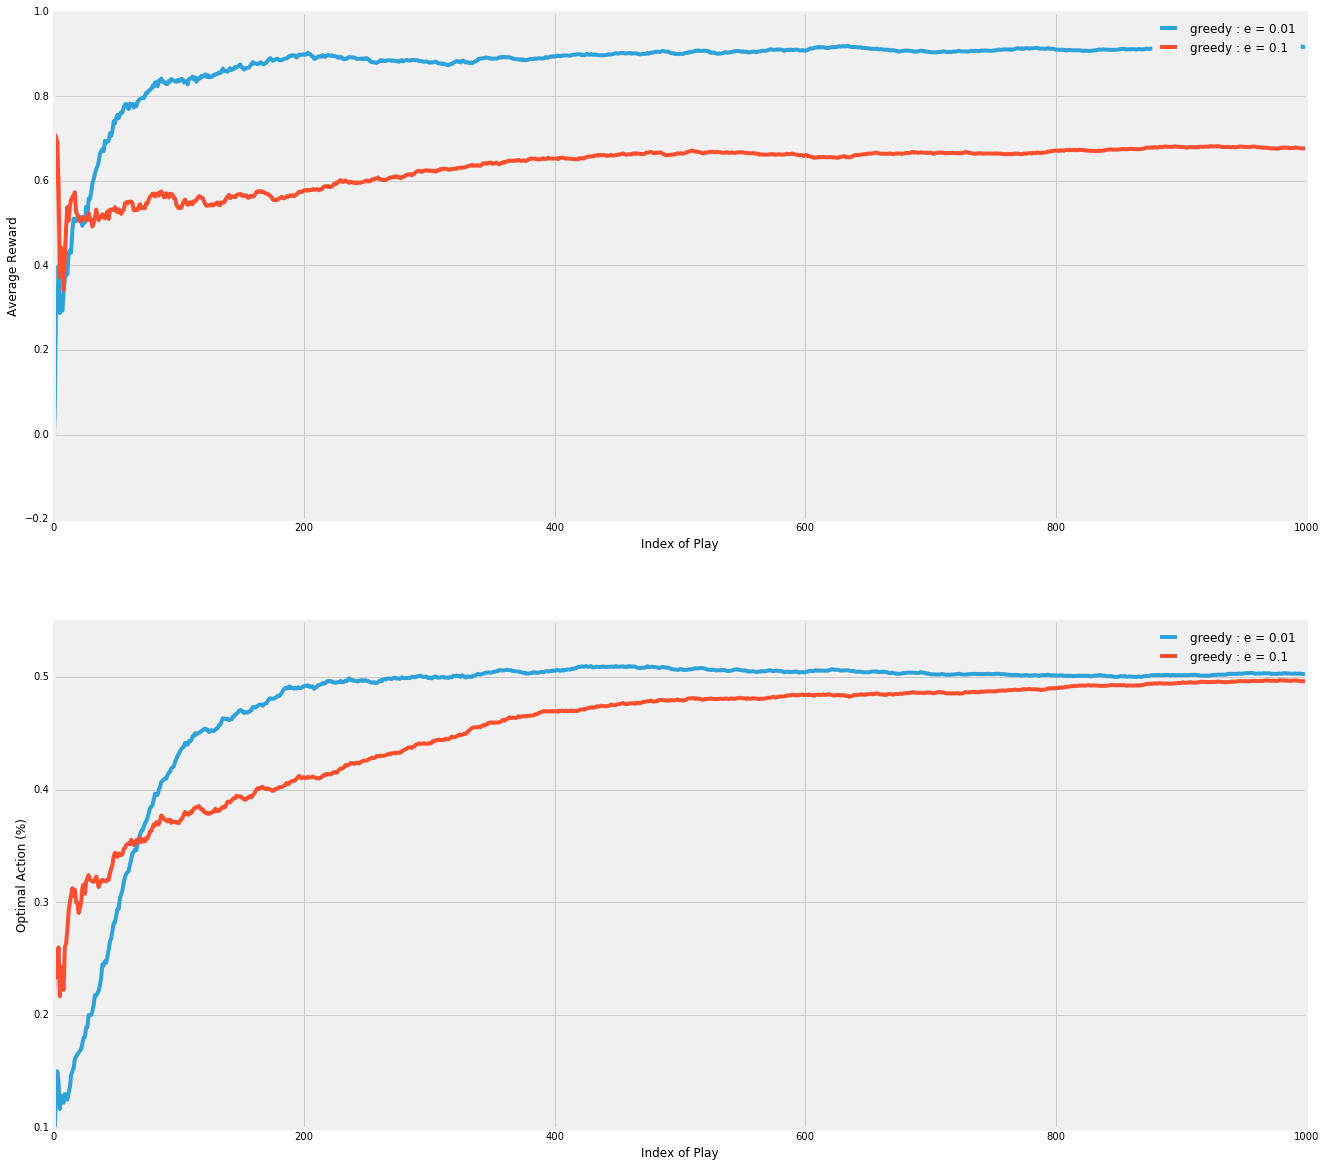

In [13]:
fig = plt.figure(figsize=(20, 20))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
for desc, stat in output.items(): 
    
    average_reward_stat = stat[0]
    prob_optimal_action_stat = stat[1]
    
    ax1.plot(average_reward_stat, label = desc)
    ax1.set_ylabel('Average Reward')
    ax1.set_xlabel('Index of Play')
    
    ax2.plot(prob_optimal_action_stat, label = desc)
    ax2.set_ylabel('Optimal Action (%)')
    ax2.set_xlabel('Index of Play')

ax1.legend()
ax2.legend()
fig.show()